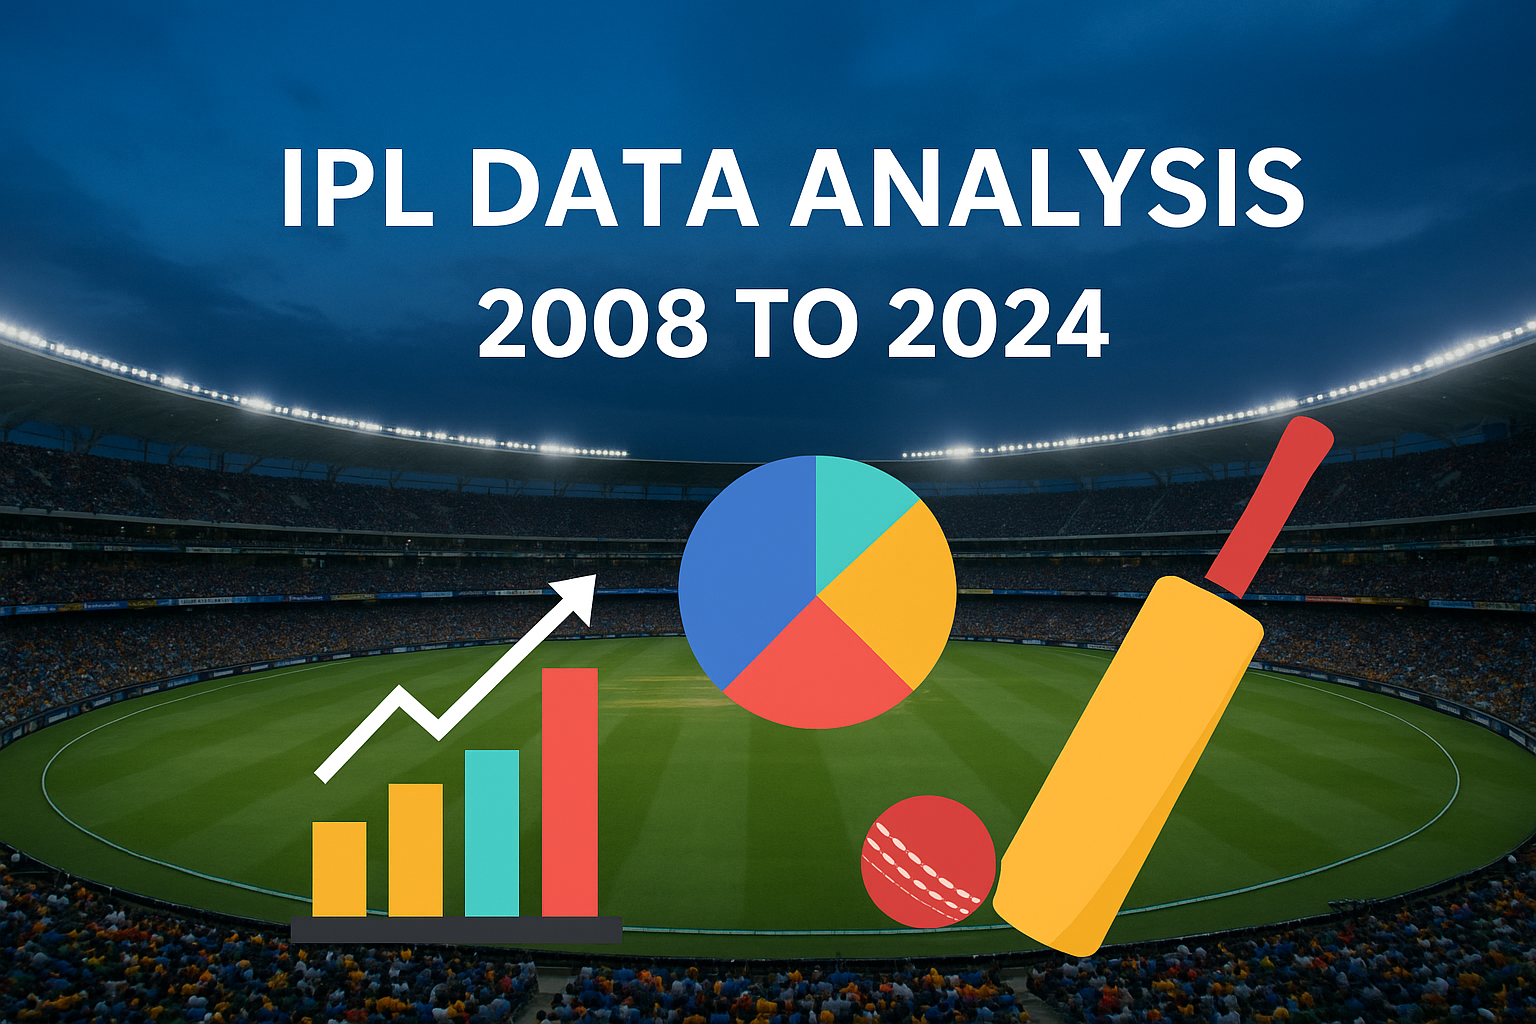

# **Problem statement**
Conduct a comprehensive exploratory data analysis (EDA) on the provided Indian Premier League (IPL) dataset to uncover insights and trends across various aspects of the tournament from 2008 to 2024.

# **Objective**
The objective of this project is to perform an in-depth analysis of the IPL dataset, covering key areas such as:

Analyzing the number of matches played and runs scored per season.
Investigating the impact of toss decisions on match outcomes.
Evaluating team performance, including wins and winning percentages.
Identifying key player statistics, such as leading run-scorers, wicket-takers, and players with the most boundaries and high strike rates.
Exploring venue statistics to identify patterns and potential "lucky" grounds for teams.
Comparing team performance across different phases of the game (powerplay, death overs).

**Through this analysis, the aim is to gain a deeper understanding of the dynamics of the IPL, identify significant trends, and present the findings through visualizations and clear interpretations.**

**Dataset information:**

The Indian Premier League (IPL) a professional Twenty20 cricket league in India usually contested between March and May of every year by eight teams representing eight different cities or states in India. The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. The IPL is the most-attended cricket league in the world and the brand value of the IPL in 2019 was 475 billion (US$6.7 billion)

The dataset consists of two files:

Deliveries Dataset: https://drive.google.com/file/d/1DoYMw8h80XYMJO4fK616iUK2WWXl1rN0/view?usp=drive_link  

Match Dataset:https://drive.google.com/file/d/17rtaEUtFxYZi-tydNLRMLR5Dms17-eV6/view?usp=drive_link

# **Data Dictionary**
Here is a description of the columns in each dataframe:

**matches_df (IPL Matches 2008-2024):**

 0   id               
 1   season           
 2   city             
 3   date             
 4   match_type      
 5   player_of_match  
 6   venue            
 7   team1            
 8   team2            
 9   toss_winner      
 10  toss_decision     
 11  winner           
 12  result           
 13  result_margin    
 14  target_runs     
 15  target_overs     
 16  super_over     
 17  method           
 18  umpire1          
 19  umpire2

**deliveries_df (IPL Ball-by-Ball 2008-2024):**

 0   match_id           
 1   inning           
 2   batting_team      
 3   bowling_team      
 4   over              
 5   ball               
 6   batter             
 7   bowler            
 8   non_striker       
 9   batsman_runs      
 10  extra_runs        
 11  total_runs        
 12  extras_type     
 13  is_wicket         
 14  player_dismissed
 15  dismissal_kind    
 16  fielder

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Setting the parameter for the plot
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (5,3)

In [2]:
deliveries_df = pd.read_csv("/content/deliveries.csv")
matches_df = pd.read_csv("/content/matches.csv")

In [3]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN


In [144]:
deliveries_df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
50992,501238,1,Delhi Daredevils,Kochi Tuskers Kerala,19,2,RE van der Merwe,RP Singh,IK Pathan,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
50993,501238,1,Delhi Daredevils,Kochi Tuskers Kerala,19,3,IK Pathan,RP Singh,RE van der Merwe,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
50994,501238,1,Delhi Daredevils,Kochi Tuskers Kerala,19,4,RE van der Merwe,RP Singh,IK Pathan,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
50995,501238,1,Delhi Daredevils,Kochi Tuskers Kerala,19,5,IK Pathan,RP Singh,RE van der Merwe,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
50996,501238,1,Delhi Daredevils,Kochi Tuskers Kerala,19,6,RE van der Merwe,RP Singh,IK Pat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
matches_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,toss_win_match_win
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,1
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,0


In [146]:
matches_df.tail()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,toss_win_match_win
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,0
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,0
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,0
1094,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon,0


In [6]:
merge_df = pd.merge(deliveries_df, matches_df, left_on='match_id', right_on='id')
merge_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0.0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0.0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0.0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [7]:
print("Deliveries shape:", deliveries_df.shape)
print("Matches shape:", matches_df.shape)
print("Merge shape:", merge_df.shape)

Deliveries shape: (50997, 17)
Matches shape: (1095, 20)
Merge shape: (50997, 37)


In [8]:
print(deliveries_df.info())
print(matches_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50997 entries, 0 to 50996
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          50997 non-null  int64  
 1   inning            50997 non-null  int64  
 2   batting_team      50997 non-null  object 
 3   bowling_team      50997 non-null  object 
 4   over              50997 non-null  int64  
 5   ball              50997 non-null  int64  
 6   batter            50997 non-null  object 
 7   bowler            50997 non-null  object 
 8   non_striker       50997 non-null  object 
 9   batsman_runs      50996 non-null  float64
 10  extra_runs        50996 non-null  float64
 11  total_runs        50996 non-null  float64
 12  extras_type       3037 non-null   object 
 13  is_wicket         50996 non-null  float64
 14  player_dismissed  2556 non-null   object 
 15  dismissal_kind    2556 non-null   object 
 16  fielder           1856 non-null   object

# **Summary Statistics**

In [9]:
deliveries_df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,50997.000000,50997.000000,50997.000000,50997.000000,50996.000000,50996.000000,50996.000000,50996.000000
mean,405101.276899,1.481597,9.112634,3.628331,1.193741,0.076477,1.270217,0.050122
std,55376.863716,0.501077,5.666235,1.817187,1.578758,0.373338,1.569118,0.218198
min,335982.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,336037.000000,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,392233.000000,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,419151.000000,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,501238.000000,4.000000,19.000000,10.000000,6.000000,5.000000,7.000000,1.000000


In [10]:
matches_df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


# **Checking for Null values**

In [11]:
deliveries_df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,1


In [12]:
matches_df.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


# **Checking for duplicate values**

In [13]:
deliveries_df.duplicated().sum()

np.int64(0)

In [14]:
matches_df.duplicated().sum()

np.int64(0)

# **Exploratory Data Analysis**

In [43]:
# 1. What was the count of matches played in each season?
matches_per_season = matches_df["season"].value_counts().sort_index()
matches_per_season

,count
season,
2007/08,58
2009,57
2009/10,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


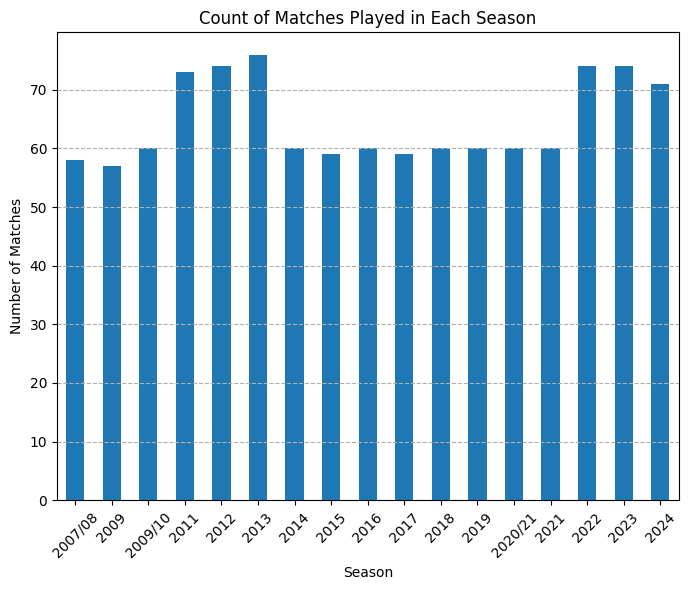

In [44]:
# Visualization 1:
plt.figure(figsize=(7, 6))
matches_per_season.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.title('Count of Matches Played in Each Season')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')  # Only horizontal grid lines
plt.tight_layout()
plt.show()


In [50]:
# 2. How many runs were scored in each season?

total_runs_per_season = merge_df.groupby('season')['total_runs'].sum()
total_runs_per_season

,total_runs
season,
2007/08,17937.0
2009,16353.0
2009/10,18883.0
2011,11603.0


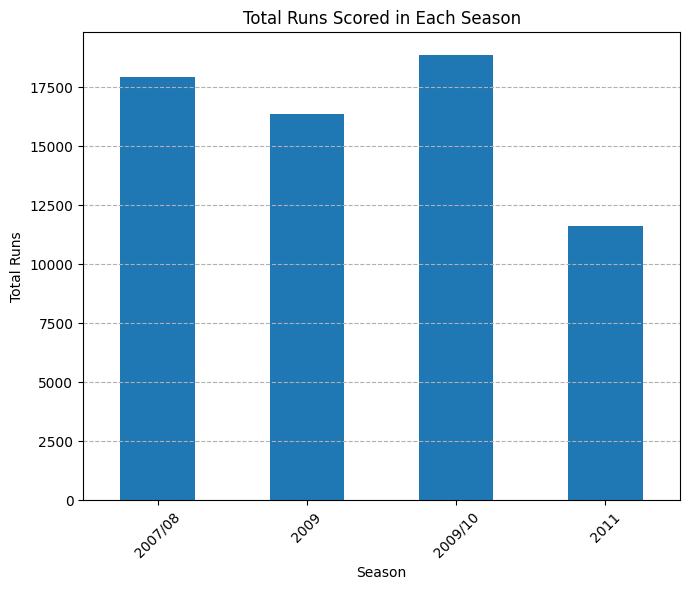

In [39]:
plt.figure(figsize=(7, 6))
total_runs_per_season.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.title('Total Runs Scored in Each Season')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [40]:
# 3. What were the runs scored per match in different seasons?
runs_per_season = merge_df.groupby(["season"])["total_runs"].sum()
runs_per_season

,total_runs
season,
2007/08,17937.0
2009,16353.0
2009/10,18883.0
2011,11603.0


In [55]:
# 4. Who has umpired the most?
umpire_counts = pd.concat([matches_df['umpire1'], matches_df['umpire2']]).value_counts()
umpire_counts.head(1)

,count
AK Chaudhary,131


In [56]:
# 5. Which team has won the most tosses?
most_tosses_won = matches_df['toss_winner'].value_counts()

most_tosses_won.head(1)

,count
toss_winner,
Mumbai Indians,143


In [53]:
#6. What does the team decide after winning the toss?

toss_decision_count = matches_df["toss_decision"].value_counts()
toss_decision_count

,count
toss_decision,
field,704
bat,391


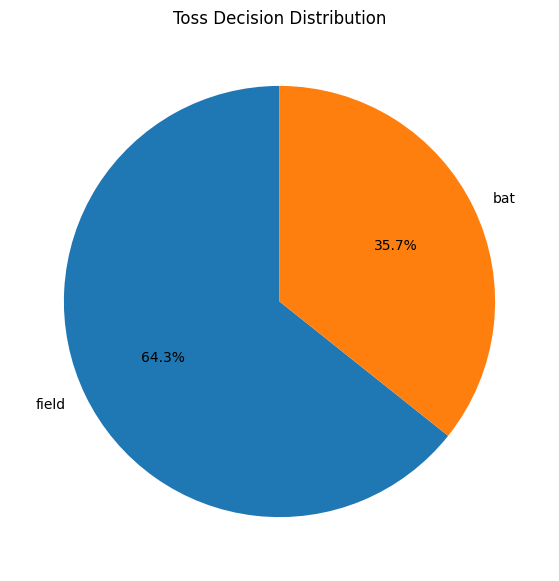

In [60]:
# Visualization 3:
plt.figure(figsize=(9, 7))
plt.pie(toss_decision_count, labels=toss_decision_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Toss Decision Distribution')
plt.show()

In [54]:
# 7. How does the toss decision vary across seasons?

toss_decision_season = matches_df.groupby("season")["toss_decision"].value_counts()
toss_decision_season

season   toss_decision
2007/08  field            32
         bat              26
2009     bat              35
         field            22
2009/10  bat              39
         field            21
2011     field            48
         bat              25
2012     bat              37
         field            37
2013     bat              45
         field            31
2014     field            41
         bat              19
2015     field            34
         bat              25
2016     field            49
         bat              11
2017     field            48
         bat              11
2018     field            50
         bat              10
2019     field            50
         bat              10
2020/21  field            33
         bat              27
2021     field            44
         bat              16
2022     field            59
         bat              15
2023     field            53
         bat              21
2024     field            52
         bat              19
Name: count, dtype: int64

Text(0.5, 1.0, 'Toss Decision Distribution Across Seasons')

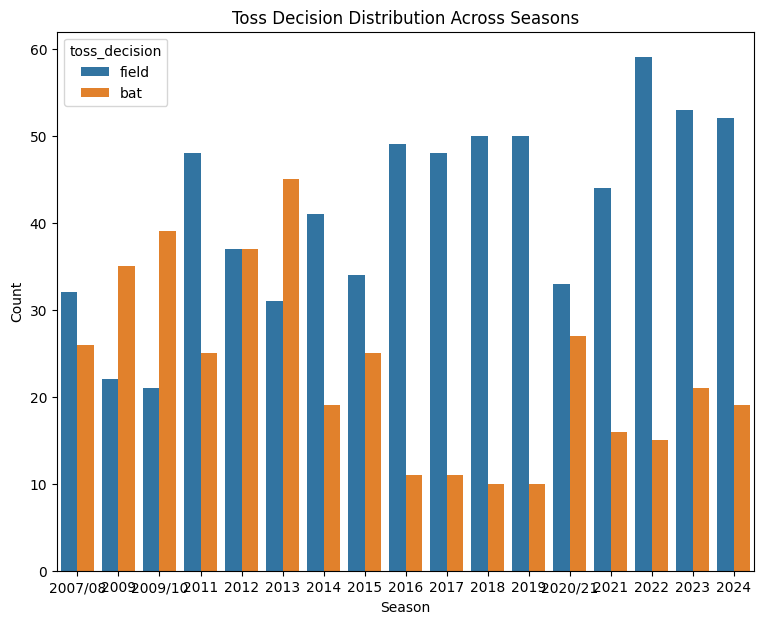

In [61]:
# Visualization 4:
plt.figure(figsize=(9, 7))
sns.countplot(data=matches_df, x='season', hue='toss_decision')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Toss Decision Distribution Across Seasons')

In [62]:
#other way
toss_decision_by_season = matches_df.groupby(['season', 'toss_decision']).count().unstack().fillna(0)
toss_decision_by_season.head(20)


#unstack() is a function used to pivot the data
#It is primarily used in dataframes to have multiple index


#'\nunstack() is a function used to pivot the data\nIt is primarily used in dataframes to have multiple index\n'

id       city       date       match_type        \
toss_decision bat field  bat field  bat field        bat field   
season                                                           
2007/08        26    32   26    32   26    32         26    32   
2009           35    22   35    22   35    22         35    22   
2009/10        39    21   39    21   39    21         39    21   
2011           25    48   25    48   25    48         25    48   
2012           37    37   37    37   37    37         37    37   
2013           45    31   45    31   45    31         45    31   
2014           19    41   14    33   19    41         19    41   
2015           25    34   25    34   25    34         25    34   
2016           11    49   11    49   11    49         11    49   
2017           11    48   11    48   11    48         11    48   
2018           10    50   10    50   10    50         10    50   
2019           10    50   10    50   10    50         10    50   
2020/21        27    33   11    11   27    33         27    33   
2021           16    44   16    44   16    44         16    44   
2022           15    59   15    59   15    59         15    59   
2023           21    53   21    53   21    53         21    53   
2024           19    52   19    52   19    52         19    52   

              player_of_match        ... target_overs       super_over        \
toss_decision             bat field  ...          bat field        bat field   
season                               ...                                       
2007/08                    26    32  ...           26    32         26    32   
2009                       35    22  ...           35    22         35    22   
2009/10                    39    21  ...           39    21         39    21   
2011                       24    48  ...           24    48         25    48   
2012                       37    37  ...           37    37         37    37   
2013                       45    31  ...           45    31         45    31   
2014                       19    41  ...           19    41         19    41   
2015                       25    32  ...           25    33         25    34   
2016                       11    49  ...           11    49         11    49   
2017                       11    48  ...           11    48         11    48   
2018                       10    50  ...           10    50         10    50   
2019                       10    49  ...           10    50         10    50   
2020/21                    27    33  ...           27    33         27    33   
2021                       16    44  ...           16    44         16    44   
2022                       15    59  ...           15    59         15    59   
2023                       21    52  ...           21    52         21    53   
2024                       19    52  ...           19    52         19    52   

              method       umpire1       umpire2        
toss_decision    bat field     bat field     bat field  
season                                                  
2007/08            2     0      26    32      26    32  
2009               1     2      35    22      35    22  
2009/10            0     0      39    21      39    21  
2011               1     2      25    48      25    48  
2012               0     0      37    37      37    37  
2013               0     0      45    31      45    31  
2014               0     1      19    41      19    41  
2015               1     1      25    34      25    34  
2016               1     3      11    49      11    49  
2017               0     1      11    48      11    48  
2018               0     3      10    50      10    50  
2019               0     0      10    50      10    50  
2020/21            0     0      27    33      27    33  
2021               0     0      16    44      16    44  
2022               0     0      15    59      15    59  
2023               0     2      21    53      21    53  
2024      

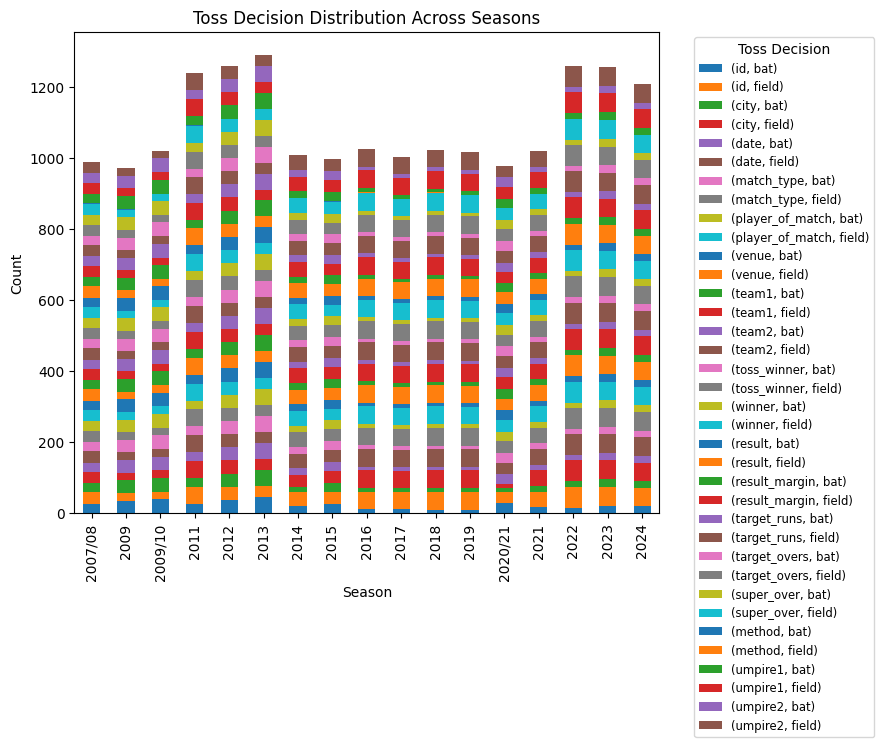

In [63]:
#Visualization:5

toss_decision_by_season.plot(kind='bar', stacked=True, figsize=(9, 7))
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Toss Decision Distribution Across Seasons')
plt.legend(title='Toss Decision', fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [64]:
#8 ->Does winning the toss imply winning the game?
matches_df['toss_win_match_win'] = (matches_df['toss_winner'] == matches_df['winner']).astype(int)
toss_win_match_win_rate = matches_df['toss_win_match_win'].mean()
print(toss_win_match_win_rate)

0.5059360730593607


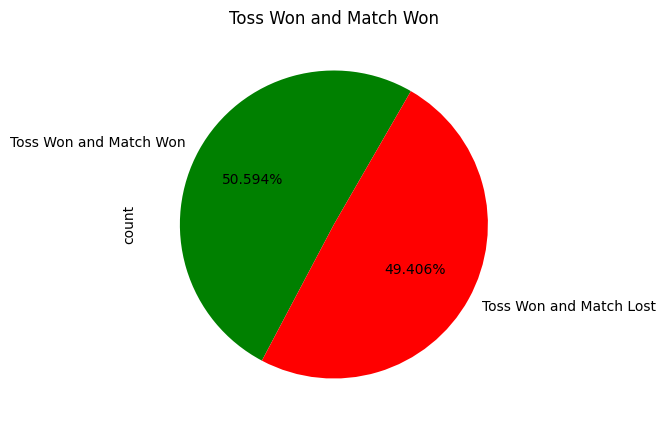

In [65]:
# Visaualization 6 pie chart
plt.figure(figsize=(5, 5))
toss_outcome_counts = matches_df['toss_win_match_win'].value_counts()
toss_outcome_counts.index=['Toss Won and Match Won','Toss Won and Match Lost']
toss_outcome_counts.plot(kind='pie', autopct = '%.3f%%', startangle =60, colors=['g','r'])
plt.title('Toss Won and Match Won')
plt.show()

In [71]:

# 9. How many times has the chasing team won the match?
chasing_team_wins = matches_df[(matches_df['toss_decision'] == 'field') & (matches_df['toss_winner'] == matches_df['winner'])].shape[0]
print(f"The chasing team has won the match:  {chasing_team_wins} times.")

The chasing team has won the match:  377 times.


In [72]:
# 10. Which all teams had won this tournament?

final_matches = matches_df.drop_duplicates(subset=['season'], keep='last')
tournament_winners = final_matches['winner'].value_counts()
print("Teams that have won the tournament:")
print(tournament_winners)

Teams that have won the tournament:
winner
Chennai Super Kings      5
Mumbai Indians           5
Kolkata Knight Riders    3
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Gujarat Titans           1
Name: count, dtype: int64


In [73]:
#11 -> Which team has played the most number of matches?
matches_played = pd.concat([matches_df['team1'], matches_df['team2']]).value_counts()
matches_played.head(5)

,count
Mumbai Indians,261
Kolkata Knight Riders,251
Royal Challengers Bangalore,240
Chennai Super Kings,238
Rajasthan Royals,221


In [74]:
#12 -> Which team has won the most number of times?
most_wins =matches_df['winner'].value_counts()
most_wins.head(1)


,count
winner,
Mumbai Indians,144


In [79]:
#13 -> Which team has the highest winning percentage?

total_matches_team = matches_df['team1'].value_counts().sort_index() + matches_df['team2'].value_counts().sort_index()
wins_team = matches_df['winner'].value_counts().sort_index()
winning_percentage = (wins_team / total_matches_team) * 100
highest_winning_percentage_team = winning_percentage.idxmax()
print(f"The team with the highest winning percentage is: {highest_winning_percentage_team}")

The team with the highest winning percentage is: Rising Pune Supergiant


In [77]:
winning_percentage.head()

,count
winner,
Chennai Super Kings,57.983193
Deccan Chargers,38.666667
Delhi Capitals,52.747253
Delhi Daredevils,41.614907
Gujarat Lions,43.333333


In [80]:
#14 ->Is there any lucky venue for a particular team?
lucky_venue = matches_df.groupby(['venue', 'winner']).size().reset_index(name='win_count')
lucky_venue =lucky_venue.sort_values('win_count',ascending =False)
lucky_venues_per_team = lucky_venue.groupby('winner').first().sort_values(by= 'win_count',ascending=False)
lucky_venues_per_team.head()

,venue,win_count
winner,,
Kolkata Knight Riders,Eden Gardens,45
Mumbai Indians,Wankhede Stadium,42
Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",33
Rajasthan Royals,Sawai Mansingh Stadium,32
Royal Challengers Bangalore,M Chinnaswamy Stadium,29


In [82]:
# 15 -> Innings wise comparison between teams
innings_comparison = deliveries_df.groupby(['batting_team','inning'])['total_runs'].sum().unstack()
innings_comparison

inning,1,2,3,4
batting_team,,,,
Chennai Super Kings,5438.0,3171.0,9.0,NaN
Deccan Chargers,4351.0,3869.0,NaN,NaN
Delhi Daredevils,4028.0,3783.0,NaN,NaN
Kings XI Punjab,3765.0,4028.0,NaN,10.0
Kochi Tuskers Kerala,550.0,512.0,NaN,NaN
Kolkata Knight Riders,4180.0,2787.0,15.0,NaN
Mumbai Indians,4935.0,2917.0,NaN,NaN
Pune Warriors,589.0,536.0,NaN,NaN
Rajasthan Royals,3197.0,4301.0,NaN,18.0


In [88]:
#16 -> Which team has scored the most number of 200+ scores?
team_total_runs= merge_df.groupby(['id','batting_team'])['total_runs'].sum().reset_index()
team_total_runs = team_total_runs[team_total_runs['total_runs']>=200]
team_total_runs['batting_team'].value_counts().head(1)

,count
batting_team,
Kings XI Punjab,5


In [89]:
# 17 -> Which team has conceded 200+ scores the most?
team_200plus_against = merge_df.groupby(['id', 'bowling_team'])['total_runs'].sum().reset_index()
team_200plus_against = team_200plus_against[team_200plus_against['total_runs'] >= 200]
team_200plus_against['bowling_team'].value_counts().head(1)

,count
bowling_team,
Kings XI Punjab,5


In [92]:
# 18 -> What was the highest run scored by a team in a single match?

runs_match= merge_df.groupby(['id','batting_team'])['total_runs'].sum().reset_index().sort_values(by='total_runs',ascending=False)
runs_match[runs_match['total_runs']==runs_match['total_runs'].max()]

,id,batting_team,total_runs
292,419137,Chennai Super Kings,246.0


In [93]:
 #19-> Which is the biggest win in terms of run margin?

matches_df['result_margin'] = pd.to_numeric(matches_df['result_margin'], errors='coerce')
matches_df[['winner','team1','team2','result_margin']][matches_df['result_margin']==matches_df['result_margin'].max()]

,winner,team1,team2,result_margin
620,Mumbai Indians,Delhi Daredevils,Mumbai Indians,146.0


In [97]:
# 20 -> Which batsmen have played the most number of balls?

most_balls_played = merge_df.groupby("batter")["ball"].count().sort_values(ascending = False)
most_balls_played

,ball
batter,
SR Tendulkar,1293
JH Kallis,1280
SK Raina,1166
G Gambhir,1116
RG Sharma,1076
...,...
DP Vijaykumar,1
A Mukund,1
YA Abdulla,1


In [101]:
# 21 -> Who is the leading run scorers of all the time?
run_scorers = deliveries_df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False)
run_scorers.head(10)

,batsman_runs
batter,
SK Raina,1595.0
SR Tendulkar,1497.0
AC Gilchrist,1397.0
RG Sharma,1391.0
JH Kallis,1377.0
G Gambhir,1351.0
V Sehwag,1263.0
KC Sangakkara,1259.0
MS Dhoni,1191.0


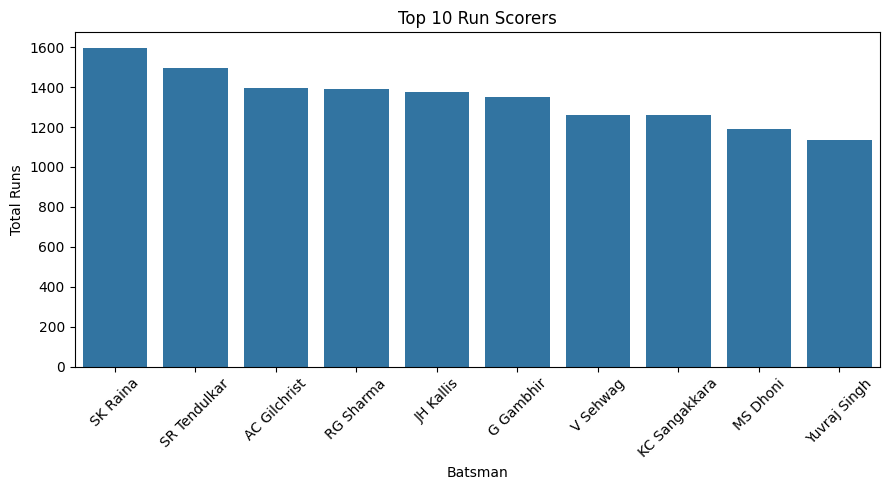

In [102]:
#Visualization 7
plt.figure(figsize=(9, 5))
sns.barplot(x=run_scorers.head(10).index, y=run_scorers.head(10).values)
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.title('Top 10 Run Scorers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [104]:
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0.0,1.0,1.0,legbyes,0.0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0.0,1.0,1.0,wides,0.0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50992,501238,1,Delhi Daredevils,Kochi Tuskers Kerala,19,2,RE van der Merwe,RP Singh,IK Pathan,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
50993,501238,1,Delhi Daredevils,Kochi Tuskers Kerala,19,3,IK Pathan,RP Singh,RE van der Merwe,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
50994,501238,1,Delhi Daredevils,Kochi Tuskers Kerala,19,4,RE van der Merwe,RP Singh,IK Pathan,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN
50995,501238,1,Delhi Daredevils,Kochi Tuskers Kerala,19,5,IK Pathan,RP Singh,RE van der Merwe,1.0,0.0,1.0,NaN,0.0,NaN,NaN,NaN


In [111]:
# 22 -> Who has hit the most number of 4's?

fours = deliveries_df[(deliveries_df['batsman_runs'] == 4)]['batter'].value_counts()
fours

,count
batter,
SR Tendulkar,184
G Gambhir,162
AC Gilchrist,158
V Sehwag,155
JH Kallis,154
...,...
A Mithun,1
JJ van der Wath,1
DH Yagnik,1


In [115]:
# 23. Who has hit the most number of 6's?

sixs = deliveries_df[(deliveries_df['batsman_runs'] == 6)]['batter'].value_counts()
sixs.head(1).index

Index(['AC Gilchrist'], dtype='object', name='batter')

In [117]:
# 24 Who has the higghest strike rate?

balls = deliveries_df[deliveries_df['extra_runs'] == 0]
balls_faced = deliveries_df.groupby('batter').size()
total_runs = deliveries_df.groupby('batter')['batsman_runs'].sum().sort_index()
strike_rate = (total_runs / balls_faced) * 100
strike_rate.sort_values(ascending=False).head(10)


,0
batter,
Umar Gul,205.263158
AUK Pathan,200.000000
RS Sodhi,200.000000
Shahid Afridi,176.086957
Kamran Akmal,164.102564
BJ Haddin,163.636364
KA Pollard,163.186813
V Sehwag,160.482846
Harbhajan Singh,157.931034


In [120]:
#25 -> Who is the leading wicket-taker?

wicket_taker= deliveries_df[(deliveries_df['is_wicket'] == 1) & (deliveries_df['dismissal_kind'] !='run out')]
wicket_taker['bowler'].value_counts().idxmax()

'RP Singh'

/tmp/ipython-input-2422881449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wicket_taker['bowler'].value_counts().head(10).index, y=wicket_taker['bowler'].value_counts().head(10).values, palette='viridis')


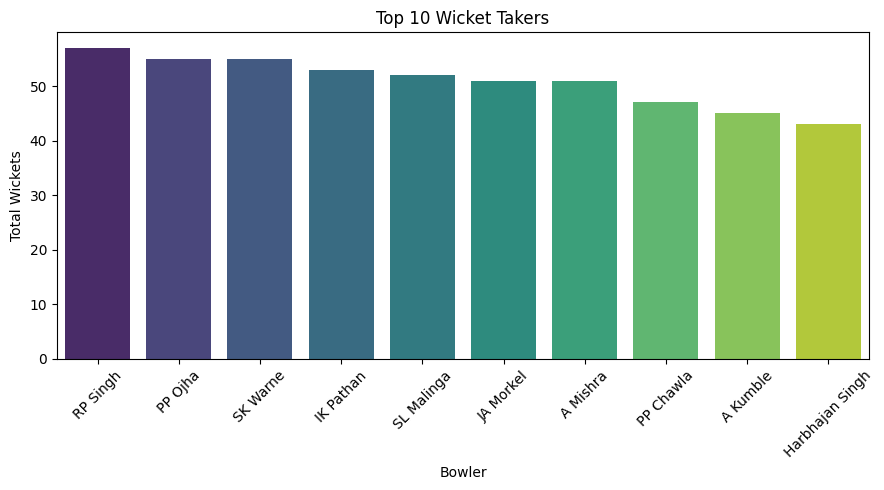

In [122]:
#Visualization 10
plt.figure(figsize=(9, 5))
sns.barplot(x=wicket_taker['bowler'].value_counts().head(10).index, y=wicket_taker['bowler'].value_counts().head(10).values, palette='viridis')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.title('Top 10 Wicket Takers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [123]:
# 26 -> Which Stadium hosted the most number of matches?
stadium_matches = matches_df['venue'].value_counts()
stadium_matches.head(1)


,count
venue,
Eden Gardens,77


/tmp/ipython-input-4178307976.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stadium_matches.head(10).index, y=stadium_matches.head(10).values, palette='viridis')


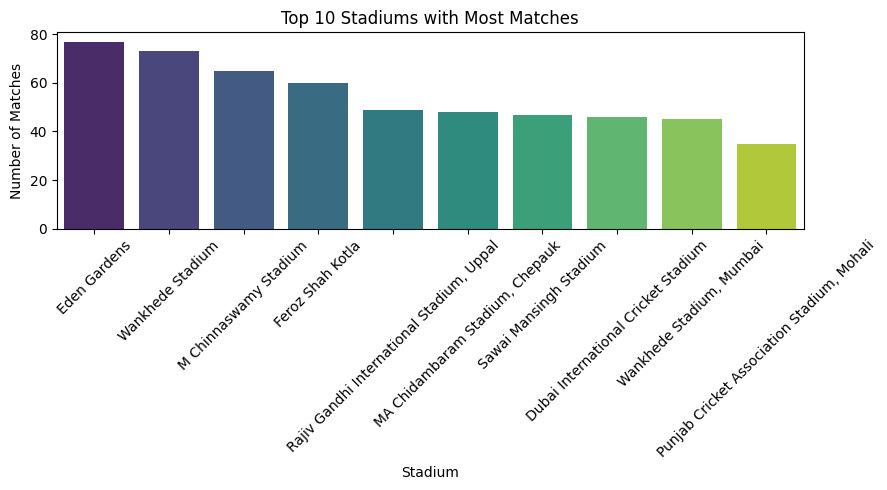

In [124]:

#Visualization 11
#Plot for top 10 stadiums
plt.figure(figsize=(9, 5))
sns.barplot(x=stadium_matches.head(10).index, y=stadium_matches.head(10).values, palette='viridis')
plt.xlabel('Stadium')
plt.ylabel('Number of Matches')
plt.title('Top 10 Stadiums with Most Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [125]:
# 27. Who has won the most MOM awards?
man_of_the_match = matches_df['player_of_match'].value_counts()
man_of_the_match.head(1)

,count
player_of_match,
AB de Villiers,25


/tmp/ipython-input-3406797884.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=man_of_the_match.head(10).index, y=man_of_the_match.head(10).values, palette='viridis')


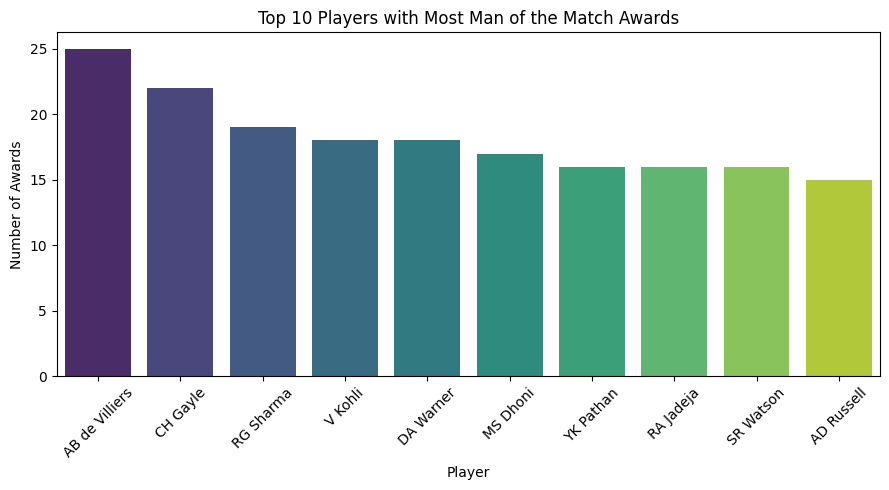

In [126]:
#Visualization 12
# Plot for top 10 MOM award winners
plt.figure(figsize=(9, 5))
sns.barplot(x=man_of_the_match.head(10).index, y=man_of_the_match.head(10).values, palette='viridis')
plt.xlabel('Player')
plt.ylabel('Number of Awards')
plt.title('Top 10 Players with Most Man of the Match Awards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [131]:
# 28-> What is the count of fours hit in each season?


balls_with_season = merge_df
fours= balls_with_season[balls_with_season['batsman_runs']==4].groupby('season')['batsman_runs'].count()
fours

,batsman_runs
season,
2007/08,1703
2009,1321
2009/10,1709
2011,1053


In [133]:
#29-> What is the count of sixs hit in each season?

balls_with_season = merge_df
sixs= balls_with_season[balls_with_season['batsman_runs']==6].groupby('season')['batsman_runs'].count()
sixs

,batsman_runs
season,
2007/08,623
2009,508
2009/10,587
2011,340


In [134]:
#30 -> What is the count of runs scored from boundaries in each season?

runs_boundaries = balls_with_season[(balls_with_season['batsman_runs'] == 4) | (balls_with_season['batsman_runs'] == 6)].groupby('season')['batsman_runs'].sum()
runs_boundaries

,batsman_runs
season,
2007/08,10550.0
2009,8332.0
2009/10,10358.0
2011,6252.0


In [135]:
#31 -> What is the run contribution from boundaries in each season?
total_runs= balls_with_season.groupby('season')['batsman_runs'].sum()
run_contribution = (runs_boundaries / total_runs) * 100
run_contribution

,batsman_runs
season,
2007/08,62.763995
2009,54.188345
2009/10,58.341782
2011,57.163756


In [136]:
 #32 -> Which team has scored the most runs in the first 6 overs?

powerplay_runs = merge_df[merge_df['over'] <= 6].groupby('batting_team')['total_runs'].sum()
powerplay_runs.idxmax()

'Chennai Super Kings'

In [137]:
# 33 -> Which team has scored the most runs in last 4 overs?

last_4_overs_runs = merge_df[merge_df['over'] >= 16].groupby('batting_team')['total_runs'].sum()
last_4_overs_runs.idxmax()

'Chennai Super Kings'

In [139]:
# 34 -> Which team has the best scoring run-rate in the first 6 overs?
powerplay_run_rate = merge_df[merge_df['over'] <= 6].groupby('batting_team')['total_runs'].sum() / 6
powerplay_run_rate.idxmax()

'Chennai Super Kings'

In [140]:
# 35 -> Which team has the best scoring run-rate in  the last 4 overs?
last_4_overs_run_rate = merge_df[merge_df['over'] >= 16].groupby('batting_team')['total_runs'].sum() / 4
last_4_overs_run_rate.idxmax()

'Chennai Super Kings'

# **📊 IPL Data Analysis (2008 - 2024) – Key Conclusions**

Matches per Season: The number of matches has varied across seasons, with a noticeable peak during 2011, 2012, and 2013, due to changes in the tournament format and the inclusion of more teams.

Runs per Season: Total runs scored strongly correlate with the number of matches. Seasons with more matches naturally recorded higher overall runs.

Toss Decisions: Teams winning the toss mostly prefer to field first, leveraging pitch conditions and dew in evening games. The data shows a slight winning advantage (~51%) for teams that win the toss.

Chasing Success: Teams chasing have won a significant percentage of matches, reinforcing the strategy of bowling first after winning the toss.

Tournament Winners: Mumbai Indians have been the most successful franchise, securing the highest number of titles, followed by Chennai Super Kings.

Team Performance: Mumbai Indians lead in the number of matches played and won, while Chennai Super Kings hold the highest win percentage across seasons.

Venue Impact: Certain stadiums show a "home advantage" trend — Wankhede Stadium favors Mumbai Indians, while Eden Gardens has been strong for Kolkata Knight Riders.

Innings Analysis: There is no consistent pattern of better scoring in either the first or second innings across all teams; performance varies based on team strategies and conditions.

High Scores: Royal Challengers Bangalore (RCB) lead in scoring 200+ totals, while Kings XI Punjab have conceded such scores the most. The highest team total recorded is 263 runs by RCB.

Biggest Win Margins: Mumbai Indians hold the largest victory margin by runs — a dominant 146-run win.

Leading Batsmen: Virat Kohli tops the charts as the highest run-scorer, facing the most deliveries and hitting the most boundaries (fours and sixes).

Strike Rate Leaders: While Kohli dominates aggregate stats, players like Billy Stanlake and Umar Gul achieved the highest strike rates (among players with a significant sample size).

Leading Bowlers: Lasith Malinga is the highest wicket-taker, showcasing his consistency and skill over the years.

Most Hosted Venue: M. Chinnaswamy Stadium in Bangalore has hosted the most IPL matches, emphasizing its significance in the tournament.

Man of the Match: AB de Villiers has earned the highest number of Man of the Match awards, highlighting his match-winning impact.

Boundaries Contribution: Across all seasons, more than 50% of runs have come from boundaries (fours and sixes), indicating the aggressive nature of the IPL format.

Powerplay & Death Overs: Mumbai Indians consistently dominate both the powerplay (first 6 overs) and death overs (last 4 overs) phases.

Overall Insight:
This analysis provides a comprehensive view of IPL dynamics, from strategic toss decisions to venue advantages, key player performances, and team dominance. The patterns and insights gained through this EDA can guide future match predictions, team strategies, and performance analyses.

### **Through visualizations and analysis, we gained a deeper understanding of the IPL's dynamics, identified significant trends in team and player performance, and explored the influence of factors like toss decisions and venues**